# k-Means Methodology

##### Author information
- Name: KyungTaek Oh
- email address: walkedwith@handong.ac.kr
- GitHub: https://github.com/KyungTaek-Oh

#### Part 1. Brief background of methodology
##### 1\) **Situation prior to the emergence of the methodology**
The K-means algorithm, proposed by Duda & Hart in 1973 and further discussed by Bishop in 1995, is a widely used clustering method. It forms clusters by minimizing the squared sum of distances, also known as the distortion measure or cost function, between each data point and the center of the cluster to which the data point belongs. This algorithm iterates two steps until the positions of the centers are stabilized: 

- \(1\) For each point 'x', the algorithm finds the center nearest to 'x' and assigns 'x' to this center.<br>
- \(2\) For each center, the algorithm reestimates the center's position by taking the centroid of all points linked to it.

An additional technique, Blacklisting, has been presented by Pelleg & Moore in 2000, which assists in the optimization of the cluster centers. Blacklisting is an additional geometric computation approach where only those cluster centers which have data points belonging to a specific cluster are considered. This method considerably speeds up the computation as it does not require considering all the centers, but only those with data points in their influence sphere. Hence, it scales well with the number of centers.
##### 2\) **Reason for the emergence of the methodology**
While K-means is widely used for general clustering, it has three notable issues:<br><br>
- \(1\) The speed and scalability are insufficient considering the time required to complete each iteration.<br>
- \(2\) The user must provide the number of clusters K. <br>
- \(3\) When constrained to run with a fixed value of K, it empirically finds worse local optimum compared to when K can be dynamically adjusted.<br><br>

X-means provides solutions to issues (1) and (2) and offers a partial remedy for issue (3).
##### 3\) **Applications of the methodology**

\(1\) **Problem Types**<br>
- Unclear Number of Clusters: If the number of clusters is unclear, the X-means algorithm can be utilized to identify the optimal number of clusters.<br>
- Exploratory Data Analysis: The X-means algorithm can be effectively used in the initial stage of exploratory data analysis to understand the structure and patterns of data.<br><br>

\(2\) **Application Areas**<br>
- Image Analysis: Clustering of image data can be employed in image analysis, object recognition, and image compression.<br>
- Customer Segmentation: The X-means algorithm can be effectively used to segment customer data and develop marketing strategies based on it. Clusters can be created based on customer behavior patterns, purchase history, and interactions, enhancing understanding of different customer groups.<br>
- Bioinformatics: Clustering of gene expression data is an important issue in bioinformatics. The X-means algorithm can effectively form clusters for this type of data.<br>
- Astrophysics: It is used to determine the general size of galaxy clusters when given a dataset composed of galaxies and their (x, y) coordinates. Utilizing a fast algorithm allows statistical analysis of millions of data points and thousands of classes to be conducted within a few hours. As a result, it became possible to verify astrophysical theories using observational data on a much larger scale than in the past.<br>



#### Part 2. Key concept of methodology
##### 1\) **Key concept**
The decision to locally split a subset of the current centroids for a better fit to the data is made by BIC(The Bayesian Information Criterion).
$$
BIC(M_j) =\text{\^{l}} (D)-\frac{p_j}{2}\cdot\log{R}
$$
- $D$: Data
- $M_{j}$: A family of alternative models
- $\text{\^{l}} (D)$: The value taken at the maximum probability point, which is the log probability of the data according to the j-th model
- $p_j$: The number of parameters of $M_{j}$
- $R$: The total number of points belonging to a centroid.It is derived by utilizing the fact that the log probability of points belonging to the same centroid is the sum of the log probabilities of individual centroids.
- $BIC$: The performace evaluation based on criteria that aim to find a balance between the model's complexity and its fit to the data

Ref\) $BIC$<br> 
It is one of the criteria used to evaluate the performance of a model in statistical modeling and machine learning. It is used to find a balance between the complexity of the model and its fit to the data.
- Equation<br>
$$
BIC= k\cdot\log{n}-2\cdot\log{L}
$$
- $n$: The number of data points
- $k$: The number of parameters in the model
- $L$: The maximum likelihood of the model
  BIC imposes a penalty on the complexity of the model, thereby preventing overfitting.
- **Interpretation of results**: Among multiple candidate models, the model with the smallest BIC value is chosen. That is, it selects a model that explains the data well while also having low complexity.

##### 2\) **Step**
The value of K starts from the minimum within a given range and continues to add centroids where needed until it reaches the maximum. Furthermore, the following two operations repeat until the algorithm is completed:<br><br>
\(1\) Improve-Params: Executes the existing K-means.<br>
\(2\) Improve-Structure: Determines whether new centroids appear and their locations. This is achieved when some centroids are split into two. The following describes the process of splitting a single parent cluster into child clusters:<br>

- \(2-1\) The structure improvement operation splits each centroid into two.<br>
  <figure>
    <img src="쪼개는 과정1.png"/>
    <figcaption><center>Figure 1. The result of running K-means with three centroids.</center></figcaption>
  </figure> <br>

- \(2-2\) Each of the split children moves in opposite directions along a random vector, proportional to the size of the region.<br>
  <figure>
      <img src="쪼개는 과정2.png"/>
      <figcaption><center>Figure 2. Each original centroids splits into two children.</center></figcaption>
    </figure> <br>
- \(2-3\) For each pair of children in each parent region, a local K-means (with K = 2) is run, allowing the children to compete over the parent region.<br>
  <figure>
      <img src="쪼개는 과정3.png"/>
      <figcaption><center>Figure 3. The first step of parallel local 2-means The line coming out of each centroid shows where it moves to.</center></figcaption>
    </figure> <br>
- \(2-4\) A choice is made between the parent and one of the children. A test is performed to decide whether the split children are accurately modeling the actual structure or if the parent prior to splitting is modeling the distribution well, and one is chosen between the parent and children. As a result, regions of space poorly represented by the current centroids garner more attention as the number of centroids increases.<br>
  <figure>
      <img src="쪼개는 과정4.png"/>
      <figcaption><center>Figure 4. The result after all all parallel 2-means have terminated.</center></figcaption>
    </figure> <br>
- \(2-5\) The test method to determine who to choose between the split children and the parent makes a local decision that maximizes the posterior probability, using a statistically based criterion.
  <figure>
      <img src="쪼개는 과정5.png"/>
      <figcaption><center>Figure 5. The survivng centroids after all the local model scoring tests.</center></figcaption>
    </figure> <br>
(3) If $K > K_{max}$ stop and pick best scoring model.<br>

##### 3\) **Main strength**

- \(3-1\) **Speed** <br>
X-means has been shown to run twice as fast as K-means for larger problems. It has proven to be much faster than repeatedly using accelerated K-means for various K values.
  <figure>
    <img src="속도 비교.png"/>
    <figcaption><center>Figure 6. Run-times of X-means and K-means. Average run-times are shown for 3 dimensions and 250 classes.</center></figcaption>
  </figure> <br>

- \(3-2\) **Distortion** <br>
 A comparison of the average distortion per point between X-means and K-means indicates that X-means has less distortion.
  <figure>
    <img src="왜곡 비교.png"/>
    <figcaption><center>Figure 7. Distortion of X-means and K-means, showing average distortion per point. Results are the average of 30 runs on 3-D data with 250 classes.</center></figcaption>
  </figure> <br>

  - \(3-3\) **BIC score** <br>
  Not only does X-means achieve better scores than K-means, it has also been observed to perform better than the underlying distributions used to generate the data.
  <figure>
    <img src="BIC 점수 비교.png"/>
    <figcaption><center>Figure 8. BIC of X-means and K-means. Average BIC per point is shown. Results are the average of multiple runs on 2-D data with 100 classes.</center></figcaption>
  </figure> <br>


#### Part 3. Example
1) **Hyperparameter**<br>
- (1-1) Initial Minimum Cluster Count ($K_{min}$): This is the minimum count of clusters to start with when running the X-means algorithm. A larger value might result in a longer execution time for the algorithm. If not set appropriately, the algorithm might generate either too many or too few clusters.<br>

- (1-2) Maximum Cluster Count ($K_{max}$): This is the maximum count of clusters that can be generated in the X-means algorithm. A larger value might lead to a longer execution time for the algorithm. Setting this value too low might prevent the algorithm from generating the necessary number of clusters.<br>

- (1-3) Distance Metric: Like K-means, the X-means algorithm uses a distance metric to calculate the distance between data points. While the Euclidean distance is commonly used, other distance metrics such as Manhattan distance, cosine similarity, etc. can also be used. It is important to choose a suitable distance metric depending on the characteristics of the data.<br>

2) **Result**<br>
Figure 9 is the result of running X-means with k ranging from 2 to 10, and among all clusters, we selected the one with k=4 as it has the highest BIC score. Figures 10, 11, ..., 18 each show the result when k takes values from 2 to 10, respectively.
As such, K-means requires adjusting the k value to find an appropriate k.<br><br>
However, in the case of X-means, it selects clusters with the optimal k value that gives the highest BIC score. Also, the X-means graph is faster and less distorted than the K-means graph, and has a higher BIC score.<br><br> 
Therefore, it can be utilized in various areas such as customer segmentation, gene expression data clustering, and determining the size of a galaxy group.


In [1]:
# Make sure to install pyclustering and bring numpy up to version 1.23.4 to make it compatible.
import numpy as np
!pip3 install pyclustering
!pip install numpy==1.23.4
print(np.__version__)

     --------------------------------------- 14.7/14.7 MB 11.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2
1.23.5


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\user\\anaconda3\\envs\\gpuenv\\Lib\\site-packages\\numpy\\~ore\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [4]:
'''
In case of encountering an "OSError: dlopen" on a Mac, execute the following commands in the terminal.

git clone https://github.com/annoviko/pyclustering.git
cd pyclustering
make ccore
'''

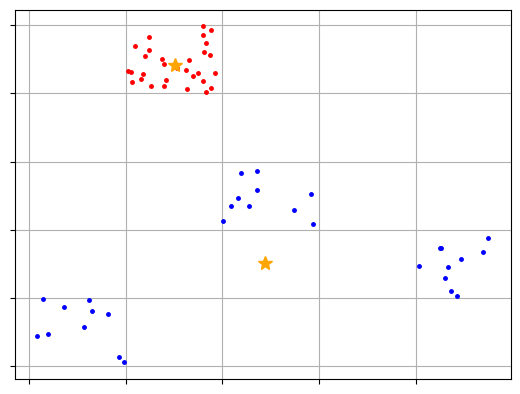

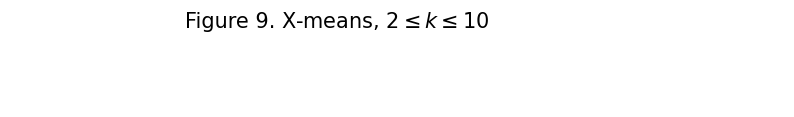

In [2]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import SIMPLE_SAMPLES
import matplotlib.pyplot as plt

# Read sample 'simple3' from file.
sample = read_sample(SIMPLE_SAMPLES.SAMPLE_SIMPLE3)

# Prepare initial centers - amount of initial centers defines amount of clusters from which X-Means will start analysis.
amount_initial_centers = 2
# The reason for initialization in K++ is that a poor choice of initial origin will require more iterations to converge to the global optimum and may distort the final result.
initial_centers = kmeans_plusplus_initializer(sample, amount_initial_centers).initialize()

# Create instance of X-Means algorithm. The algorithm will start analysis from 2 clusters, the maximum number of clusters that can be allocated is 10.
xmeans_instance = xmeans(sample, initial_centers, 10)
xmeans_instance.process()

# Extract clustering results: clusters and their centers
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()

# Figure Order
figure_number=9

# Visualize clustering results
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, sample)
visualizer.append_cluster(centers, None, marker='*', markersize=10, color='orange')
visualizer.show()
plt.figure(figsize=(10,1))
plt.figtext(.3,.9,"Figure {}.".format(figure_number), fontsize=15)
plt.figtext(.5,.9, r"X-means, $2\leq{k}\leq{10}$", fontsize=15, ha='center')
plt.axis('off')
plt.show()

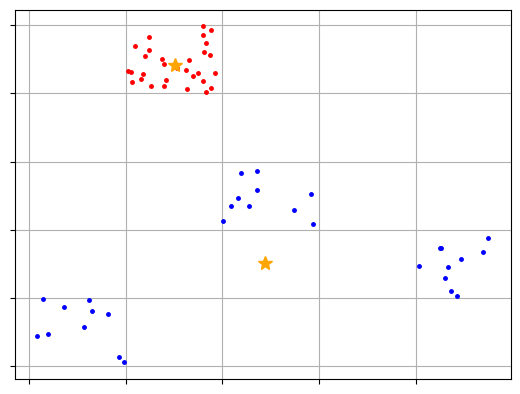

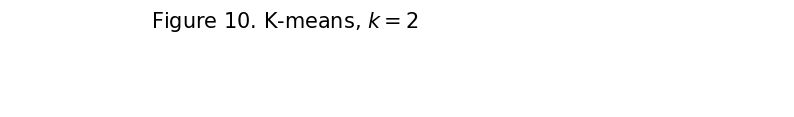

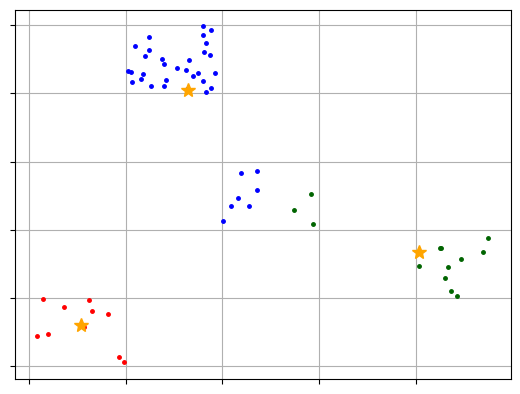

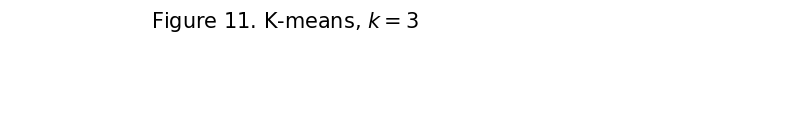

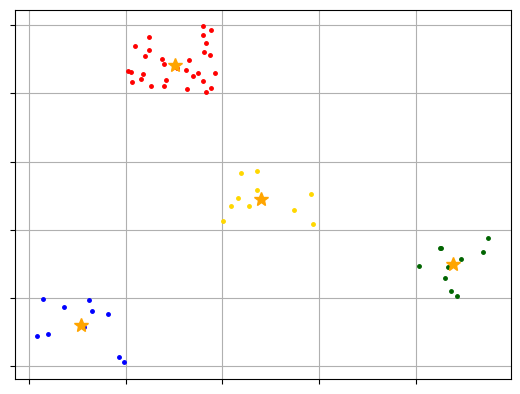

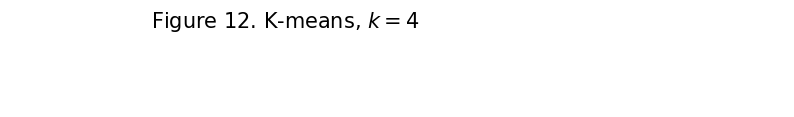

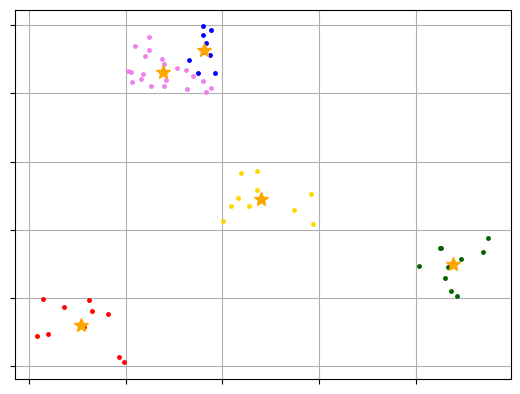

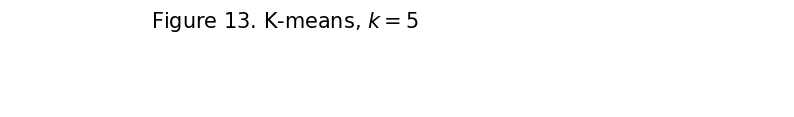

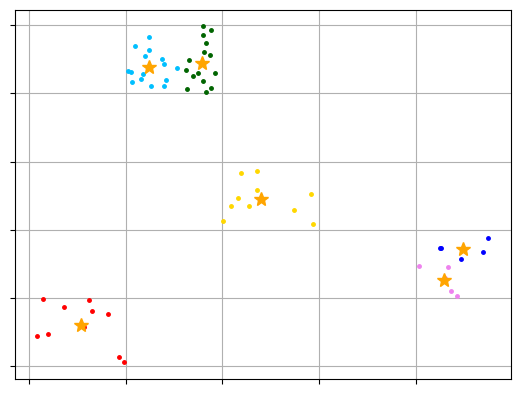

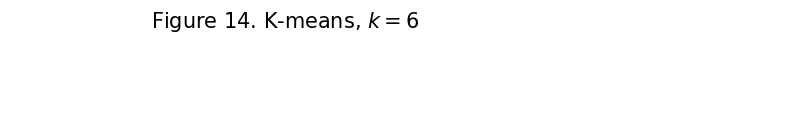

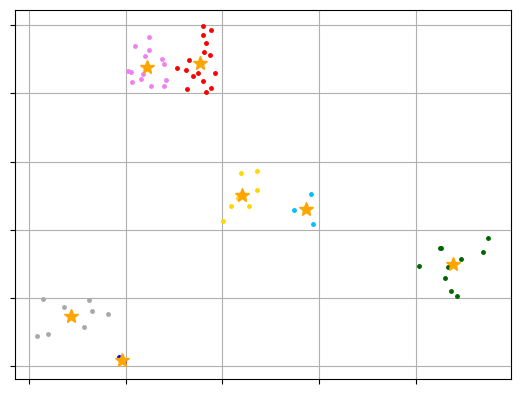

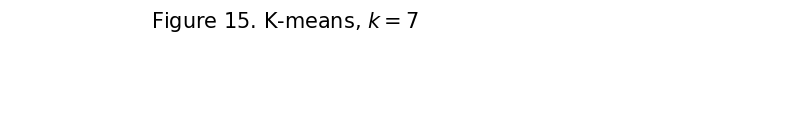

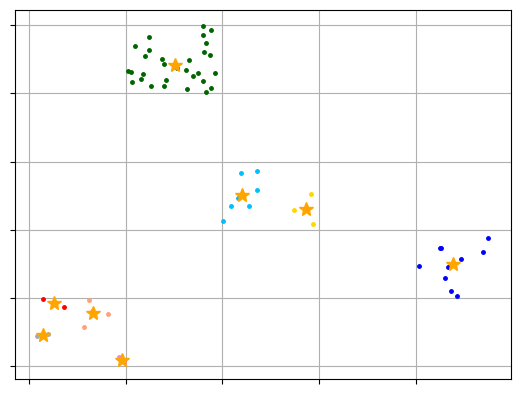

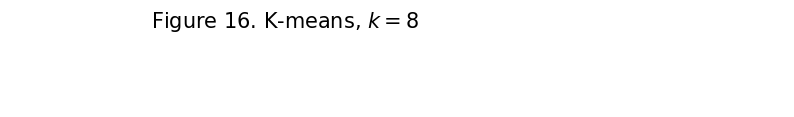

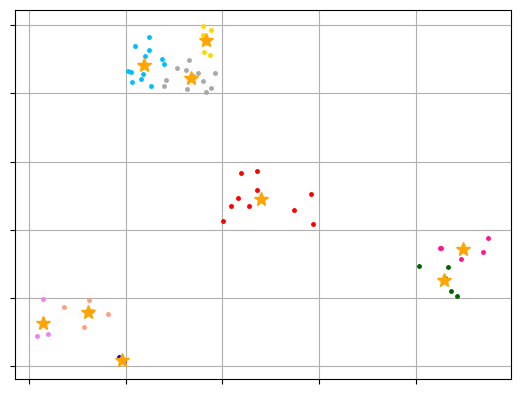

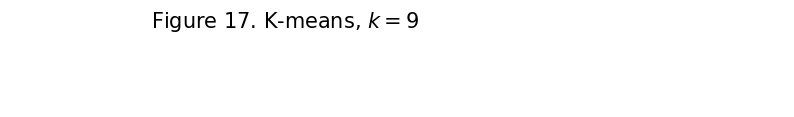

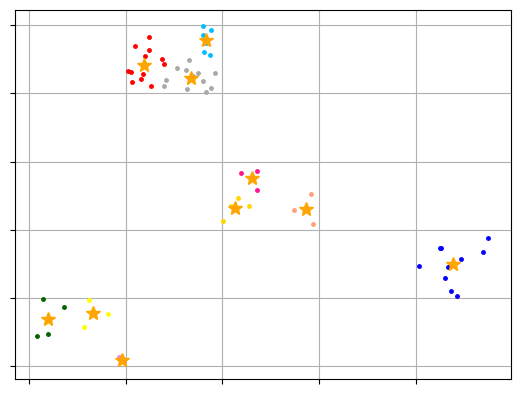

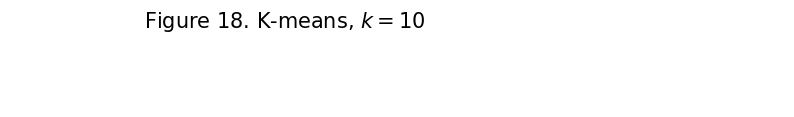

In [3]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.kmeans import kmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import SIMPLE_SAMPLES
import matplotlib.pyplot as plt

# Load 'simple3' sample from file
sample = read_sample(SIMPLE_SAMPLES.SAMPLE_SIMPLE3)
# Figure Order
figure_number=9

# Run K-Means with initial center count ranging from 2 to 10
for amount_initial_centers in range(2, 11):
    initial_centers = kmeans_plusplus_initializer(sample, amount_initial_centers).initialize()

    # Create an instance of the K-Means algorithm
    kmeans_instance = kmeans(sample, initial_centers)
    kmeans_instance.process()

    # Extract the clustering results: clusters and their centers
    clusters = kmeans_instance.get_clusters()
    centers = kmeans_instance.get_centers()

    # Visualize the clustering results
    visualizer = cluster_visualizer()
    visualizer.append_clusters(clusters, sample)
    visualizer.append_cluster(centers, None, marker='*', markersize=10,color='orange')
    visualizer.show()
    plt.figure(figsize=(10,1))
    figure_number+=1
    plt.figtext(.4,.9, r"Figure {}. K-means, $k={}$".format(figure_number,amount_initial_centers), fontsize=15, ha='center')
    plt.axis('off')
    plt.show()
